This notebook is for Assessment 2 for the module XXX Programming for the Social Sciences Core Skills


This code does...

Date
Version 1.0


In [9]:
# Import the packages required for this program
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg
import numpy as np
import csv

# Create lists to import the raster data into
r_d = []
h_pop = []

# Import the raster data files
f = open('death.rats.txt', newline='') 
reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
for row in reader:
    rats = []
    for value in row:             
        rats.append(value)  
    r_d.append(rats)      
f.close() 

f = open('death.parishes.txt', newline='') 
reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
for row in reader:
    people = []
    for value in row:             
        people.append(value) 
    h_pop.append(people)     
f.close()

# Convert the imported data to numpy arrays
rats_caught = np.array(r_d) 
human_pop = np.array(h_pop)

Now I am going to create a map of the rats caught by each rat catchers' patch.  Each pixel represents a 100x100 square 

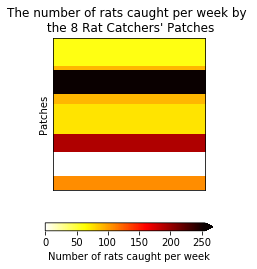

In [10]:
# Create a map of the rats caught
plt.ylim(0, 400)
plt.xlim(0, 400)
color_map = plt.imshow(rats_caught)  
color_map.set_cmap("hot_r")
plt.yticks([])
plt.xticks([])
plt.ylabel('Patches')
plt.title("The number of rats caught per week by \n the 8 Rat Catchers' Patches")
plt.colorbar(orientation='horizontal', shrink=0.5, label="Number of rats caught per week", extend='max')
plt.savefig("rats.png", bbox_inches='tight', pad_inches=0.0)

And now here is a map of the population density for each of the 16 London parishes. 

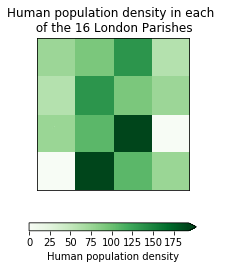

In [8]:
# Create a map of the human population density
plt.ylim(0, 400)
plt.xlim(0, 400)
color_map = plt.imshow(human_pop)  
color_map.set_cmap("Greens")
plt.xticks([])
plt.yticks([])
plt.title('Human population density in each \n of the 16 London Parishes')
plt.colorbar(orientation='horizontal', shrink=0.5, label="Human population density", extend='max')
plt.savefig("humanpop.png", bbox_inches='tight', pad_inches=0.0)

The average human deaths per week is given as:
d = (0.8 x rats caught) x (1.3 x population density).

The below code calculates the average human deaths and then saves it as a text file.   

In [11]:
for i in [rats_caught]:
    rd2 = i*0.8
for i in [human_pop]:
    hp2 = i*1.3
    
average_deaths = np.multiply(rd2, hp2)

with open('ave_deaths.txt', "w") as f:
    writer = csv.writer(f)
    writer.writerows(average_deaths)	    
f.close() 

I can now create a new map that shows the average deaths per week.

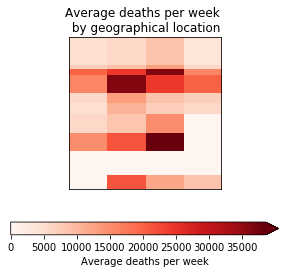

In [12]:
plt.ylim(0, 400)
plt.xlim(0, 400)
color_map = plt.imshow(average_deaths)  
color_map.set_cmap("Reds")
plt.xticks([])
plt.yticks([])
plt.title('Average deaths per week \n by geographical location')
plt.colorbar(orientation='horizontal', shrink=0.8, label="Average deaths per week", extend='max')    
plt.savefig("ave_deaths.png", bbox_inches='tight', pad_inches=0.0)  

A comparison of the three maps is below, although I cannot get them to be identical in size despite trying multiple different ways of coding the information.  

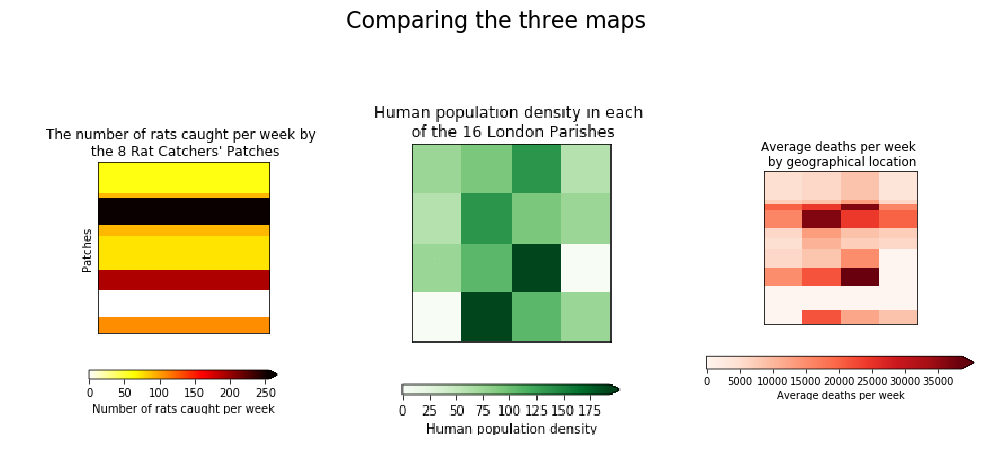

In [19]:
img1 = mpimg.imread('rats.png')
img2 = mpimg.imread('humanpop.png')
img3 = mpimg.imread('ave_deaths.png')
fig = plt.figure(figsize=(12,8), dpi=100)
fig.suptitle('Comparing the three maps', y=0.8, verticalalignment='bottom', fontsize = 16)
ax1 = plt.subplot(1,3,1)
plt.axis('off')
ax1.imshow(img1)
ax2 = plt.subplot(1,3,2)
plt.axis('off')
ax2.imshow(img2) 
ax3 = plt.subplot(1,3,3)
plt.axis('off')
ax3.imshow(img3) 

The total number of deaths per 100m by 100m square.

In [20]:
total_deaths = np.sum(average_deaths)
print("The total number of deaths over the 16 parishes per week is " + 
      str(int(round(total_deaths,None))))

The total number of deaths over the 16 parishes per week is 1642932689


The next bit of code creates a popup GUI that allows the user to enter values for the number of rats caught and the human population and then calculates the average number of deaths based on the equation:
d = (0.8 x rats caught) x (1.3 x population density).

It then allows the user to change the values '0.8' and '1.3' to other values and recalculate the average number of deaths 

In [ ]:
# Import the relevent packages for this program
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QPushButton, QLineEdit, QMessageBox, QLabel

# Create a class for the GUI
class Window(QMainWindow):
    def __init__(self):
        super().__init__()
        self.title = 'Altering the parameters'
        self.left = 200
        self.top = 200
        self.width = 500
        self.height = 600
        self.InitUI()

## Create the structure within the GUI including the text, text boxes and call the relevent methods
    def InitUI(self):
        self.label1 = QLabel(self)
        self.label1.setText('Average deaths = (0.8 x rats caught) x (1.2 x population density)')
        self.label1.resize(400,30)
        self.label1.move(20,10)
        
        self.lineedit1 = QLineEdit(self)
        self.lineedit1.setPlaceholderText('Please enter the average number of rats caught')
        self.lineedit1.setGeometry(50,50,320,30)
        
        self.lineedit2 = QLineEdit(self)
        self.lineedit2.setPlaceholderText('Please enter the population density')
                                          
        self.lineedit2.setGeometry(50,90,320,30)
        
        self.button = QPushButton("Calculate the average deaths", self)    
        self.button.setGeometry(50,150,320,50)
        self.button.clicked.connect(self.CalcAveDeaths)
        
        self.label2 = QLabel(self)
        self.label2.setText('Average deaths = (? x rats caught) x (? x population density)')                         
        self.label2.resize(300,30)
        self.label2.move(20,260)
        
        self.lineedit3 = QLineEdit(self)
        self.lineedit3.setPlaceholderText('Please enter the multipler of the  average number of rats caught')                                        
        self.lineedit3.setGeometry(50,300,320,30)
        
        self.lineedit4 = QLineEdit(self)
        self.lineedit4.setPlaceholderText('Please enter the multiplier for the population density')
        self.lineedit4.setGeometry(50,350,320,30)
        
        self.button2 = QPushButton("Recalculate the average deaths based on these new values", self)                                   
        self.button2.setGeometry(50,400,320,50)
        self.button2.clicked.connect(self.ReCalcAveDeaths)
    
        self.setWindowTitle(self.title)
        self.setGeometry(self.top, self.left, self.width, self.height)
        self.show()

## Create the calculations underpining the GUI and show the results       
    def CalcAveDeaths(self):
        num1 = float(self.lineedit1.text())
        num2 = float(self.lineedit2.text())
        average_deaths = "{0:.1f}".format((0.8*num1) * (1.3*num2))
        average_deaths_string = "The average number of deaths per week is " + str(average_deaths)   
        QMessageBox.about(self, 'Average deaths', average_deaths_string)

    def ReCalcAveDeaths(self):
        num1 = float(self.lineedit1.text())
        num2 = float(self.lineedit2.text())
        num3 = float(self.lineedit3.text())
        num4 = float(self.lineedit4.text())
        average_deaths2 = "{0:.1f}".format((num3*num1) * (num4*num2))
        average_deaths2_string = "The new average number of deaths per week is " + str(average_deaths2)       
        QMessageBox.about(self, 'New average deaths', average_deaths2_string)

# Make application loop and exit
App = QApplication(sys.argv)
window = Window()
sys.exit(App.exec())

This is the end of the program.